In [198]:
import copy
import numpy as np
import os, glob, cv2, shutil, csv
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.spatial import distance

In [183]:
def diff_distance_calculation(antena_pair_1, antena_pair_2, capsule_loc):
    diff = distance.euclidean(antena_pair_1, capsule_loc) - distance.euclidean(antena_pair_2, capsule_loc)
    return np.abs(diff)

In [414]:
antenaA = (7.1, 5)
antenaB = (-7.1, 5)
antenaC = (0, -10)
antenaD = (-7.1, -5)
antenaF = (7.1, -5)

antena_num = 10
antena_pair = [(antenaA, antenaB), (antenaB, antenaC), (antenaA, antenaC), (antenaC, antenaD), (antenaD, antenaF)]
x_lim = 20
y_lim = 20
step = 0.1 

In [415]:
# calib = np.array([1.7, 0])
table = np.zeros((int(x_lim/step), int(x_lim/step), int(antena_num/2)))
for x in range(int(y_lim/step)):
    for y in range(int(x_lim/step)):
        for i in range(len(antena_pair)):
            table[y, x, i] = diff_distance_calculation(antena_pair[i][0], antena_pair[i][1], (x * step - (x_lim/2), y * step - (y_lim/2)))

In [416]:
table = 1.8 - table / table.max() * 1.8

In [417]:
table.shape

(200, 200, 5)

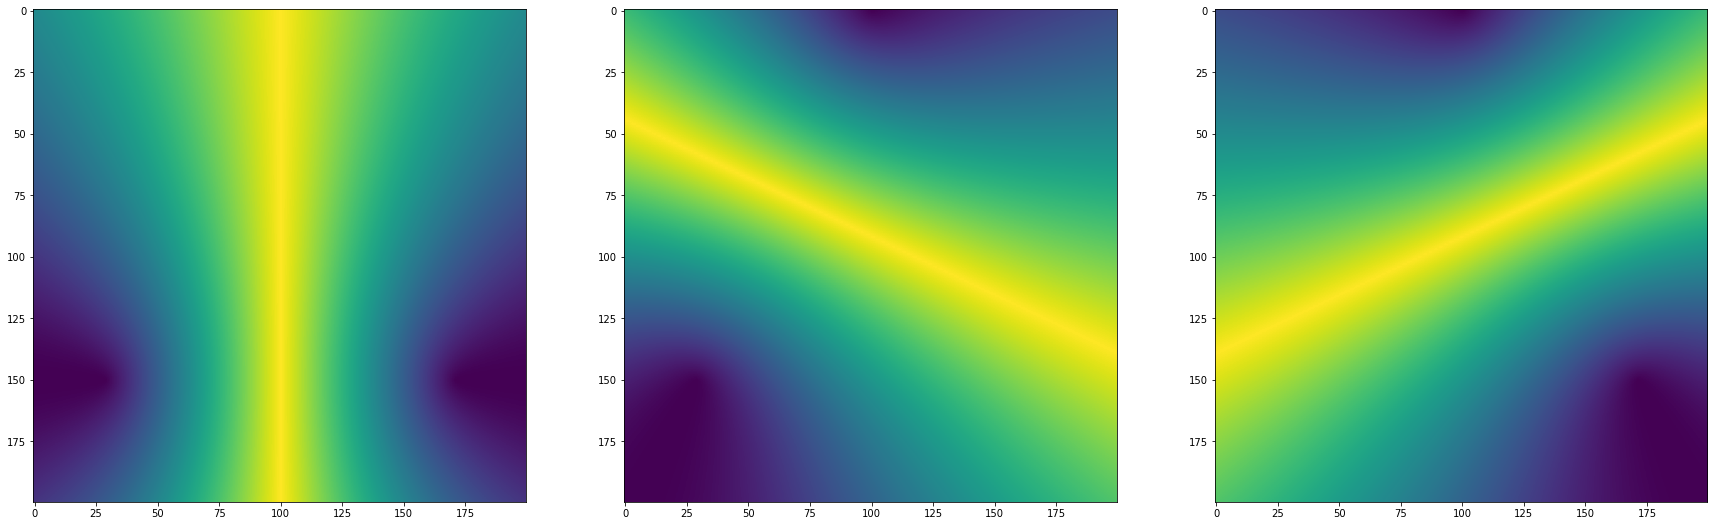

In [418]:
plt.figure(figsize = (30,10))
plt.subplot(131)
plt.imshow(table[..., 0])
plt.subplot(132)
plt.imshow(table[..., 1])
plt.subplot(133)
plt.imshow(table[..., 2])
plt.show()

In [322]:
# calib = np.array([1.7, 0]) - 1.8
# calib_array = np.tile(calib, [40,40,1])
# table_calib = table * calib_array

In [420]:
antena_receive_value = table[0, 160,:]
print(antena_receive_value)

[1.27126434 0.29072618 0.81946184 0.92993281 0.83443853]


In [421]:
table_corr = np.zeros((int(x_lim/step), int(x_lim/step)))

for y in range(int(x_lim/step)):
    for x in range(int(y_lim/step)):
        table_corr[x, y] = mean_squared_error(antena_receive_value, table[x,y,:])
table_corr = 1 - table_corr/table_corr.max()         

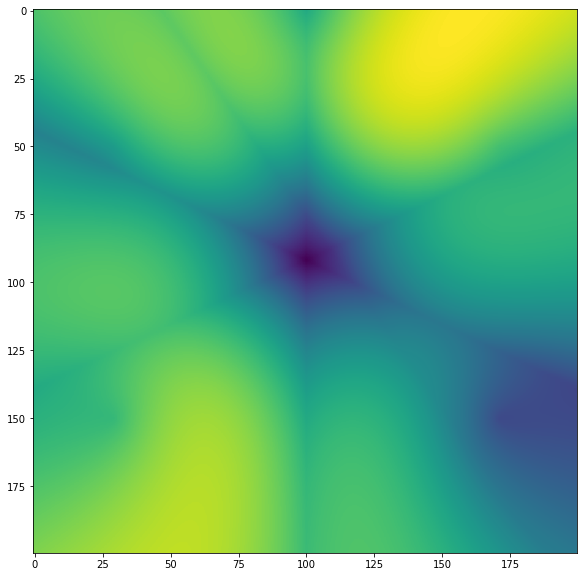

(array([0], dtype=int64), array([160], dtype=int64))


In [422]:
plt.figure(figsize = (10,10))
plt.imshow(table_corr)
plt.show()
print(np.where(table_corr == table_corr.max()))